In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
import re
from tqdm.auto import tqdm
import os
import math


# Overall GME

In [3]:
path = os.path.join(os.getcwd(), 'results_crossmodal')
lang_type = pd.read_csv('commoncrawl.csv')

x = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
for i, f in enumerate(x):
    print(f"{i}: {f}")

0: result_imgtotext_chinese-clip-vit-large-patch14.pkl.csv
1: result_imgtotext_clip-vit-large-patch14.csv
2: result_imgtotext_ColQwen2.5-3b-multilingual-v1.0.csv
3: result_imgtotext_ColQwen2.5-7b-multilingual-v1.0.csv
4: result_imgtotext_colqwen2.5-v0.2.csv
5: result_imgtotext_gme-Qwen2-VL-2B-Instruct.csv
6: result_imgtotext_gme-Qwen2-VL-7B-Instruct.csv
7: result_imgtotext_jina-embeddings-v4.csv
8: result_imgtotext_XLM-Roberta-Large-Vit-B-16Plus.csv
9: result_imgtotext_XLM-Roberta-Large-Vit-L-14.csv


In [17]:
file_name = x[8]
print(file_name)
df = pd.read_csv(path + '/' + file_name)

result_imgtotext_XLM-Roberta-Large-Vit-B-16Plus.csv


In [4]:
df = df.merge(lang_type, how='left', left_on='lang', right_on='Id')
df['native'] = df['lang_type'].apply(lambda x: x == 'low')

# Lang freq

In [4]:
def get_lang_freq(df, model_name,
    num_top_results = 100, 
    non_native_label = 'Caption Low Resource Language', 
    native_label = 'Caption Medium-High Resource Language',
    display=True,
):
    native_count_dict = {}
    english_count_dict = {}

    # Initialize dictionaries with counts from 0 to num_top_results
    for i in range(num_top_results+1):
        native_count_dict[i] = 0
        english_count_dict[i] = 0

    # Group by query_id and process each query's results
    for query_id, query_group in tqdm(df.groupby('query_id'), total=df['query_id'].nunique()):
        # Sort by result_rank to ensure proper order
        query_results = query_group.sort_values('result_rank').head(num_top_results)
            
        native_count = query_results['native'].sum()
        native_count_dict[native_count] += 1
        english_count_dict[num_top_results - native_count] += 1
        
    if display:
        print("Native count distribution:", native_count_dict)
        print("English count distribution:", english_count_dict)

    model_name_short = model_name.split('/')[-1].replace('result_', '').replace('_cleaned.csv', '').replace('.csv', '')
    title = f'Language Frequency (Img->Text) ({model_name_short})'
    # Create the plot similar to your image
    fig = plt.figure(figsize=(10, 6))

    num_display_results = 100#num_top_results
    # Create bins for histogram
    bins = range(0, num_display_results + 2)

    # Calculate histograms
    english_hist = list(english_count_dict.values())
    native_hist = list(native_count_dict.values())

    # Calculate overlapping areas
    overlap = np.minimum(english_hist, native_hist)
    english_only = english_hist - overlap
    native_only = native_hist - overlap

    # Plot the histograms with overlapping parts in gray
    bin_centers = np.arange(len(english_hist))

    # Use the figure object directly instead of plt
    ax = fig.add_subplot(111)
    
    ax.bar(bin_centers, english_only, 
            bottom=overlap, 
            color='#87CEEB', label=non_native_label, alpha=0.7, 
            edgecolor='white', linewidth=0.5, width=1.0)

    ax.bar(bin_centers, native_only, bottom=overlap, 
            color='#FFA07A', label=native_label, alpha=0.7, 
            edgecolor='white', linewidth=0.5, width=1.0)

    ax.bar(bin_centers, overlap, 
            color='gray', alpha=0.7, 
            edgecolor='white', linewidth=0.5, width=1.0)

    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    # ax.set_xticks(range(len(english_hist)), range(0, len(english_hist)))
    
    fig.tight_layout()
    
    if display:
        plt.show()
    else:
        plt.close(fig)  # Close the figure to prevent display
    
    return fig


  0%|          | 0/3600 [00:00<?, ?it/s]

Native count distribution: {0: 257, 1: 126, 2: 110, 3: 85, 4: 83, 5: 71, 6: 68, 7: 59, 8: 47, 9: 65, 10: 36, 11: 50, 12: 52, 13: 47, 14: 52, 15: 39, 16: 34, 17: 37, 18: 24, 19: 33, 20: 40, 21: 40, 22: 37, 23: 31, 24: 19, 25: 24, 26: 35, 27: 25, 28: 23, 29: 35, 30: 23, 31: 22, 32: 28, 33: 26, 34: 21, 35: 20, 36: 18, 37: 21, 38: 19, 39: 14, 40: 27, 41: 23, 42: 12, 43: 16, 44: 15, 45: 13, 46: 11, 47: 11, 48: 15, 49: 13, 50: 13, 51: 15, 52: 20, 53: 17, 54: 11, 55: 6, 56: 20, 57: 19, 58: 19, 59: 9, 60: 8, 61: 16, 62: 15, 63: 11, 64: 6, 65: 8, 66: 17, 67: 16, 68: 16, 69: 10, 70: 9, 71: 11, 72: 8, 73: 9, 74: 9, 75: 12, 76: 10, 77: 18, 78: 14, 79: 18, 80: 15, 81: 20, 82: 7, 83: 9, 84: 6, 85: 16, 86: 10, 87: 12, 88: 17, 89: 12, 90: 16, 91: 14, 92: 18, 93: 18, 94: 26, 95: 27, 96: 36, 97: 44, 98: 75, 99: 191, 100: 569}
English count distribution: {0: 569, 1: 191, 2: 75, 3: 44, 4: 36, 5: 27, 6: 26, 7: 18, 8: 18, 9: 14, 10: 16, 11: 12, 12: 17, 13: 12, 14: 10, 15: 16, 16: 6, 17: 9, 18: 7, 19: 20, 20

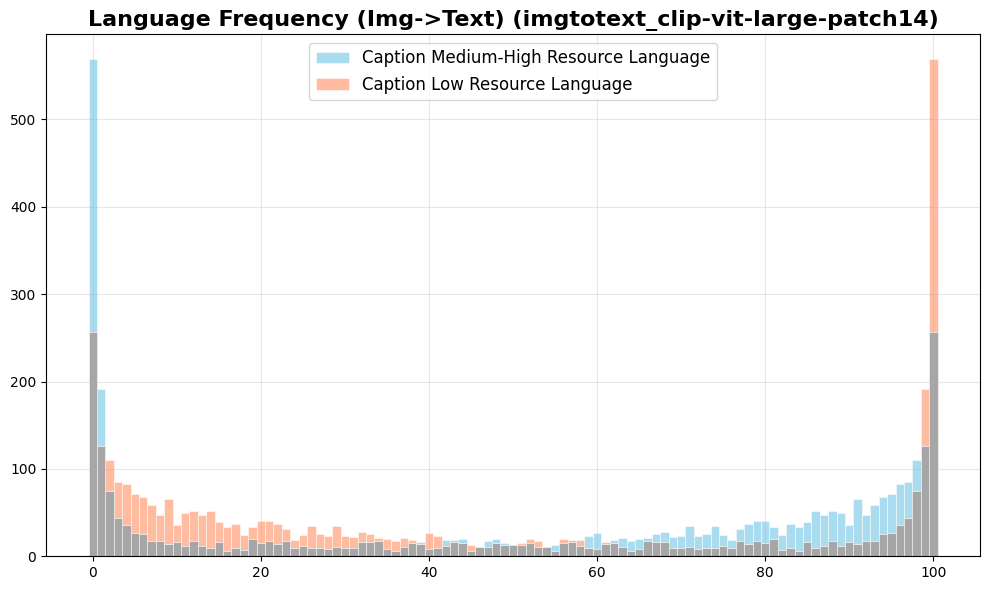

In [ ]:
fig = get_lang_freq(df, file_name, 
    num_top_results=100,
    native_label='Caption Low Resource Language',
    non_native_label='Caption Medium-High Resource Language',
    display=True
)

In [ ]:
for f in x:
    file_name = f
    print(file_name)
    # file_name = '/result_colqwen2.5-multilingual-7b_imgtotext.csv'
    df = pd.read_csv(path + '/' + file_name)
    df = df.merge(lang_type, how='left', left_on='lang', right_on='Id')
    df['native'] = df['lang_type'].apply(lambda x: x == 'low')
    gen_fig = get_lang_freq(df, file_name, 
        num_top_results=100,
        native_label='Caption Low Resource Language',
        non_native_label='Caption Medium-High Resource Language',
        display=True
    )

# All

In [5]:
MODEL_DICT = {
    'result_imgtotext_chinese-clip-vit-large-patch14.pkl.csv': 'Chinese-CLIP-L/14',
    'result_imgtotext_clip-vit-large-patch14.csv': 'CLIP-L/14',
    'result_imgtotext_colqwen2-v1.0.csv': 'ColQwen2-v1.0',
    'result_imgtotext_ColQwen2.5-3b-multilingual-v1.0.csv': 'ColQwen2.5-3B-M',
    'result_imgtotext_ColQwen2.5-7b-multilingual-v1.0.csv': 'ColQwen2.5-7B-M',
    'result_imgtotext_colqwen2.5-v0.2.csv': 'ColQwen2.5-v0.2',
    'result_imgtotext_gme-Qwen2-VL-2B-Instruct.csv': 'GME-Qwen2-2B',
    'result_imgtotext_gme-Qwen2-VL-7B-Instruct.csv': 'GME-Qwen2-7B',
    'result_imgtotext_jina-embeddings-v4.csv': 'Jina-E-v4',
    'result_imgtotext_XLM-Roberta-Large-Vit-B-16Plus.csv': 'XLM-R-B/16plus',
    'result_imgtotext_XLM-Roberta-Large-Vit-L-14.csv': 'XLM-R-L/14'
}
MODEL_FONT_SIZE = 32


In [10]:
def create_all_models_diagram(files_list, lang_type_df, results_path, diagram_type='lang_freq', variant='main'):
    """
    Create a diagram showing all models arranged in 3 columns per row
    
    Parameters:
    - files_list: list of model files
    - lang_type_df: language type dataframe 
    - results_path: path to results folder
    - diagram_type: 'lang_freq' or 'rank_freq'
    """

    # Calculate number of rows needed
    num_models = len(files_list)
    num_cols = 5 if variant != 'main' else 3
    num_rows = math.ceil(num_models / num_cols) if variant != 'main' else 1
    
    # Create figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 6*num_rows))
    
    # Flatten axes for easier indexing if more than one row
    if num_rows > 1:
        axes = axes.flatten()
    elif num_rows == 1 and num_cols > 1:
        axes = axes
    else:
        axes = [axes]
    
    # Process each model
    idx = -1
    for itr, file_name in enumerate(files_list):
        print(file_name)

        if variant == 'main':
            if not ('VL-7B' in file_name or 'Vit-L' in file_name or 'colqwen2.5' in file_name):
                continue
            print(f"Processing model {idx+1}/{num_models}: {file_name}")
        idx += 1

        # Read and prepare data
        df = pd.read_csv(os.path.join(results_path, file_name))
        df = df.merge(lang_type_df, how='left', left_on='lang', right_on='Id')
        df['native'] = df['lang_type'].apply(lambda x: x == 'low')
        
        # Get current axis
        ax = axes[idx]
        
        if diagram_type == 'lang_freq':
            create_lang_freq_subplot(df, file_name, ax, num_top_results=100)
        elif diagram_type == 'rank_freq':
            create_rank_freq_subplot(df, file_name, ax, num_top_results=100)
    
    # Hide unused subplots
    for idx in range(num_models, len(axes)):
        axes[idx].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2, wspace=0.15)
    
    # Add overall title
    # main_title = f'Language Frequency Analysis - All Models' if diagram_type == 'lang_freq' else 'Language Distribution by Rank - All Models'
    # fig.suptitle(main_title, fontsize=20, fontweight='bold', y=0.98)
    
    plt.show()
    return fig

def create_lang_freq_subplot(df, model_name, ax, num_top_results=100):
    """Create language frequency subplot for a single model"""
    
    native_count_dict = {}
    english_count_dict = {}

    # Initialize dictionaries
    for i in range(num_top_results+1):
        native_count_dict[i] = 0
        english_count_dict[i] = 0

    # Process each query
    for query_id, query_group in df.groupby('query_id'):
        query_results = query_group.sort_values('result_rank').head(num_top_results)
        native_count = query_results['native'].sum()
        native_count_dict[native_count] += 1
        english_count_dict[num_top_results - native_count] += 1

    # Prepare data for plotting
    english_hist = list(english_count_dict.values())
    native_hist = list(native_count_dict.values())
    
    # Calculate overlapping areas
    overlap = np.minimum(english_hist, native_hist)
    english_only = np.array(english_hist) - overlap
    native_only = np.array(native_hist) - overlap

    # Plot
    bin_centers = np.arange(len(english_hist))
    
    ax.bar(bin_centers, english_only, 
           bottom=overlap, 
           color='#87CEEB', label='Medium-High Resource Lang.', alpha=0.7, 
           edgecolor='white', linewidth=0.5, width=1.0)

    ax.bar(bin_centers, native_only, 
           bottom=overlap, 
           color='#FFA07A', label='Low Resource Lang.', alpha=0.7, 
           edgecolor='white', linewidth=0.5, width=1.0)

    ax.bar(bin_centers, overlap, 
           color='gray', alpha=0.7, 
           edgecolor='white', linewidth=0.5, width=1.0)

    # Format subplot
    model_name_short = MODEL_DICT[model_name]#.split('/')[-1].replace('result_', '').replace('_cleaned.csv', '').replace('.csv', '').replace('imgtotext_', '')
    ax.set_title(model_name_short, fontsize=MODEL_FONT_SIZE)#, fontweight='bold')
    ax.set_xlabel('Language Frequency')
    ax.set_ylabel('Query Count')
    ax.grid(True, alpha=0.3)
    
    # Add legend only to second subplot
    if ax.get_subplotspec().get_geometry()[2] == 0:  # Second subplot
        ax.legend(fontsize=20, )

def create_rank_freq_subplot(df, model_name, ax, num_top_results=100):
    """Create rank frequency subplot for a single model"""
    
    # Filter and prepare data
    df_filtered = df[df['result_rank'] <= num_top_results].copy()
    df_filtered = df_filtered.sort_values(['query_id', 'result_rank'])

    # Use vectorized operations to count occurrences
    rank_lang_counts = df_filtered.groupby(['result_rank', 'native']).size().unstack(fill_value=0)

    # Extract counts by rank
    if True in rank_lang_counts.columns:
        native_counts = rank_lang_counts[True]
    else:
        native_counts = pd.Series(0, index=range(1, num_top_results+1))

    if False in rank_lang_counts.columns:
        english_counts = rank_lang_counts[False]
    else:
        english_counts = pd.Series(0, index=range(1, num_top_results+1))

    # Ensure all ranks are represented
    all_ranks = range(1, num_top_results+1)
    native_rank_dict = native_counts.reindex(all_ranks, fill_value=0).to_dict()
    english_rank_dict = english_counts.reindex(all_ranks, fill_value=0).to_dict()

    # Prepare data for plotting
    ranks = list(range(1, num_top_results+1))
    english_counts_list = [english_rank_dict[rank] for rank in ranks]
    native_counts_list = [native_rank_dict[rank] for rank in ranks]

    # Calculate overlapping areas
    overlap = np.minimum(english_counts_list, native_counts_list)
    english_only = np.array(english_counts_list) - overlap
    native_only = np.array(native_counts_list) - overlap

    # Plot
    ax.bar(ranks, english_only, 
           bottom=overlap, 
           color='#87CEEB', label='Medium-High Resource Lang.', alpha=0.7,
           edgecolor='white', linewidth=0.5, width=0.8)

    ax.bar(ranks, native_only, 
           bottom=overlap, 
           color='#FFA07A', label='Low Resource Lang.', alpha=0.7,
           edgecolor='white', linewidth=0.5, width=0.8)

    ax.bar(ranks, overlap, 
           color='gray', alpha=0.7, 
           edgecolor='white', linewidth=0.5, width=0.8)

    # Format subplot
    model_name_short = MODEL_DICT[model_name]#model_name.split('/')[-1].replace('result_', '').replace('_cleaned.csv', '').replace('.csv', '').replace('imgtotext_', '')
    ax.set_title(model_name_short, fontsize=MODEL_FONT_SIZE)
    ax.set_xlabel('Rank Position')
    ax.set_ylabel('Count')
    
    ax.grid(True, alpha=0.3)
    ax.set_xticks(ranks[::10])  # Show every 10th rank
    
    # Add legend only to first subplot
    if ax.get_subplotspec().get_geometry()[2] == 0:  # First subplot
        ax.legend(fontsize=22, loc='lower center')

Creating Language Frequency Diagram for All Models...
result_imgtotext_chinese-clip-vit-large-patch14.pkl.csv
result_imgtotext_clip-vit-large-patch14.csv
result_imgtotext_ColQwen2.5-3b-multilingual-v1.0.csv
result_imgtotext_ColQwen2.5-7b-multilingual-v1.0.csv
result_imgtotext_colqwen2.5-v0.2.csv
Processing model 0/10: result_imgtotext_colqwen2.5-v0.2.csv
result_imgtotext_gme-Qwen2-VL-2B-Instruct.csv
result_imgtotext_gme-Qwen2-VL-7B-Instruct.csv
Processing model 1/10: result_imgtotext_gme-Qwen2-VL-7B-Instruct.csv
result_imgtotext_jina-embeddings-v4.csv
result_imgtotext_XLM-Roberta-Large-Vit-B-16Plus.csv
result_imgtotext_XLM-Roberta-Large-Vit-L-14.csv
Processing model 2/10: result_imgtotext_XLM-Roberta-Large-Vit-L-14.csv


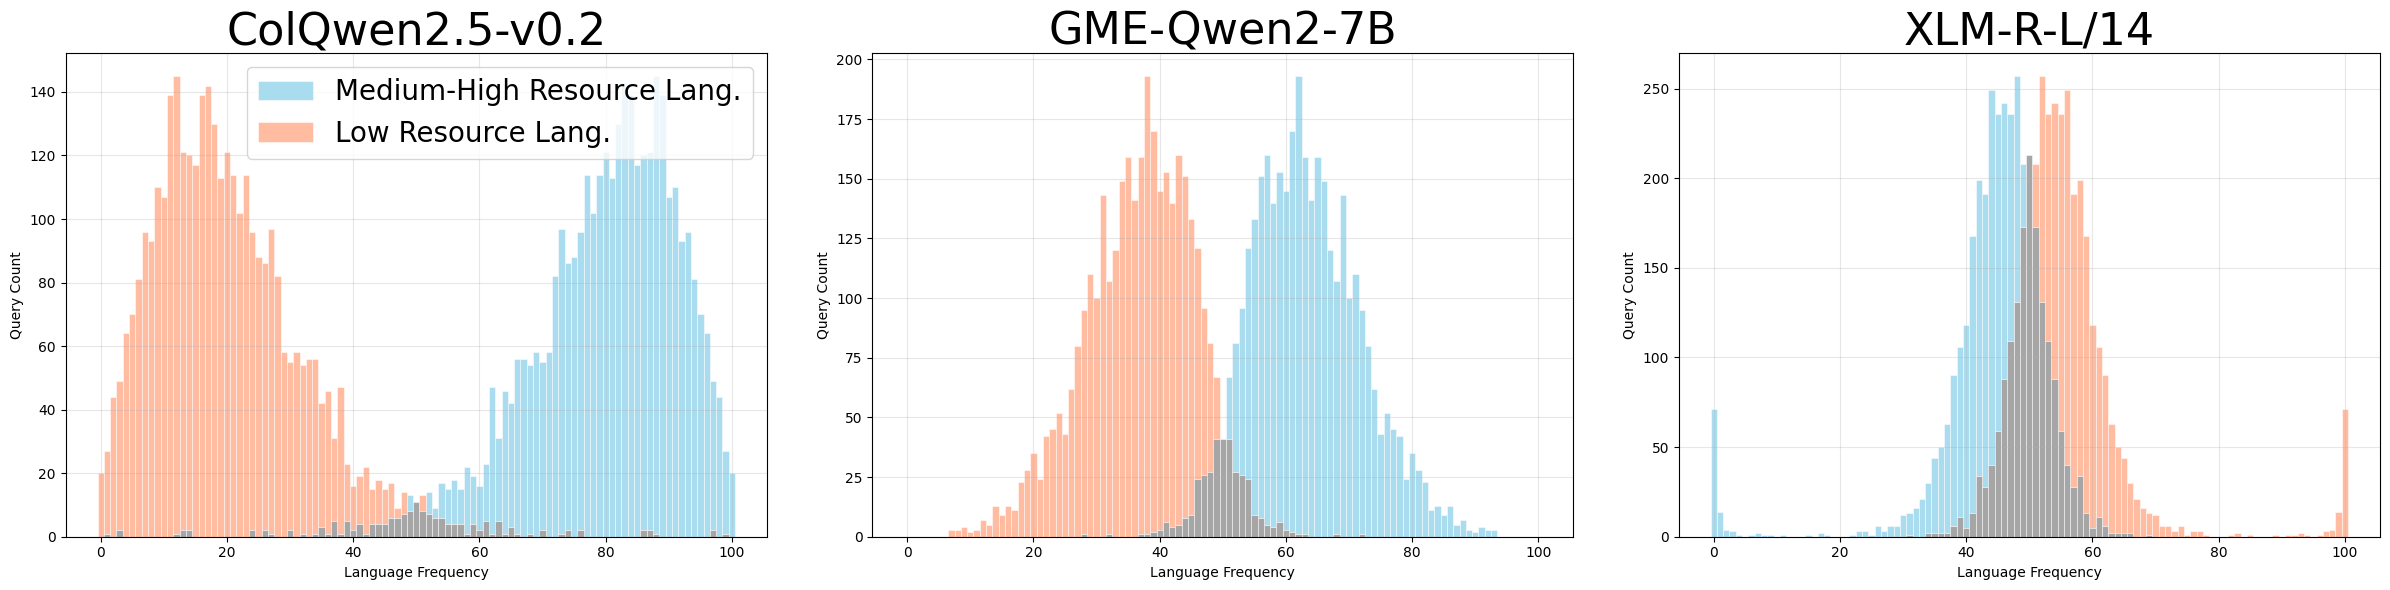

In [11]:
# Create language frequency diagram for all models
print("Creating Language Frequency Diagram for All Models...")
variant = 'main'  # 'main' or 'all'
lang_freq_fig = create_all_models_diagram(
    files_list=x, 
    lang_type_df=lang_type, 
    results_path=path, 
    diagram_type='lang_freq',
    variant=variant
)

if variant =='main':
    lang_freq_fig.savefig('fig_lang_freq.png', dpi=300)
else:
    lang_freq_fig.savefig('fig_lang_freq_full.png', dpi=300)


Creating Rank Frequency Diagram for All Models...
result_imgtotext_chinese-clip-vit-large-patch14.pkl.csv
result_imgtotext_clip-vit-large-patch14.csv
result_imgtotext_ColQwen2.5-3b-multilingual-v1.0.csv
result_imgtotext_ColQwen2.5-7b-multilingual-v1.0.csv
result_imgtotext_colqwen2.5-v0.2.csv
result_imgtotext_gme-Qwen2-VL-2B-Instruct.csv
result_imgtotext_gme-Qwen2-VL-7B-Instruct.csv
result_imgtotext_jina-embeddings-v4.csv
result_imgtotext_XLM-Roberta-Large-Vit-B-16Plus.csv
result_imgtotext_XLM-Roberta-Large-Vit-L-14.csv


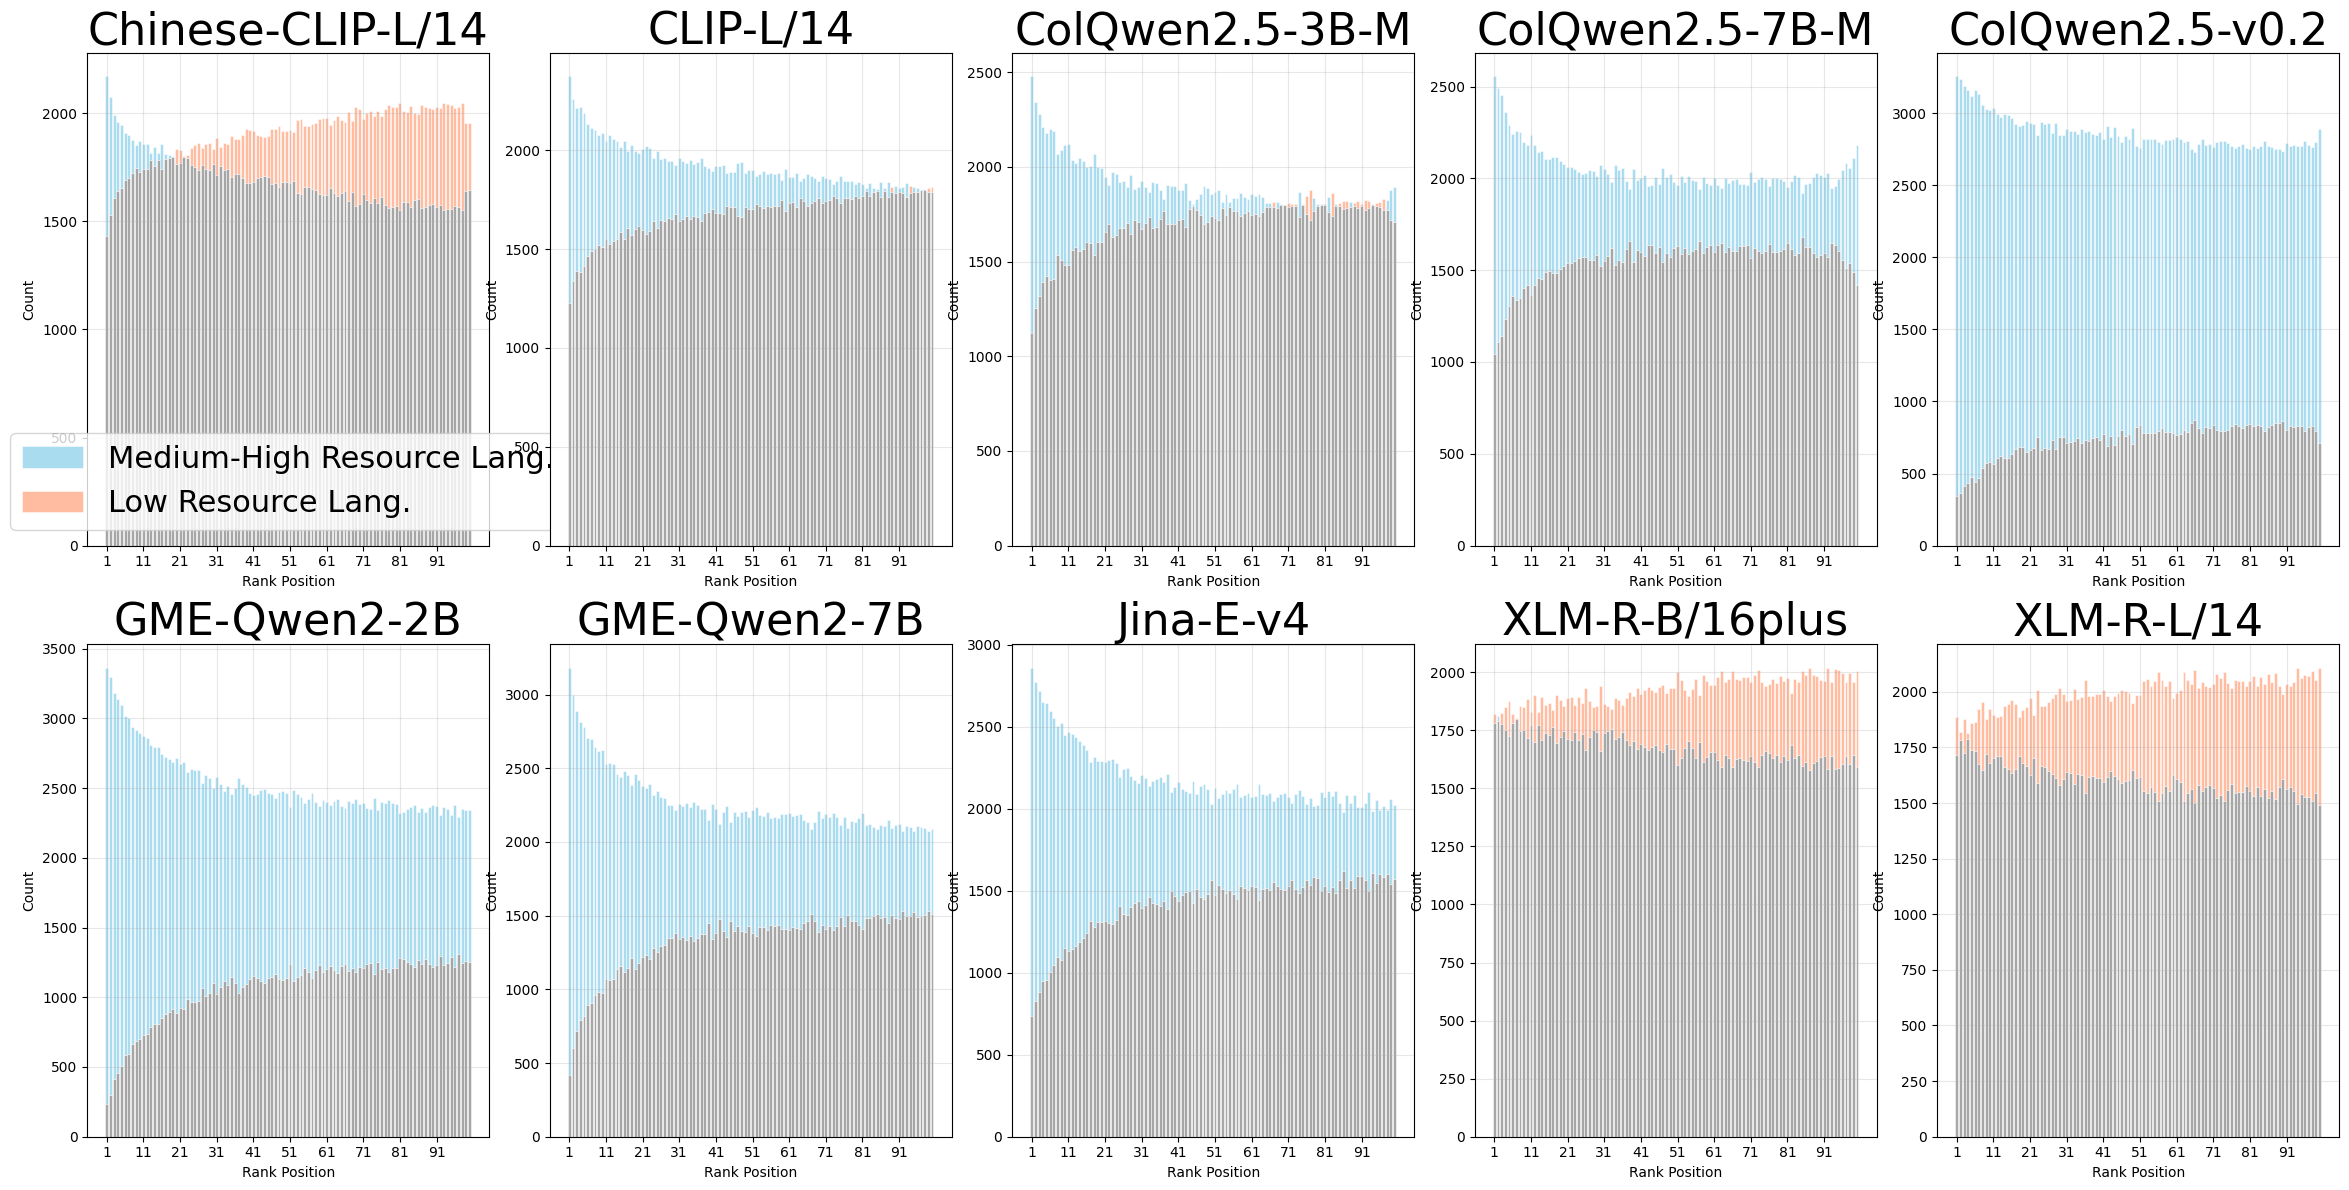

In [10]:
# Create rank frequency diagram for all models  
print("\nCreating Rank Frequency Diagram for All Models...")
rank_freq_fig = create_all_models_diagram(
    files_list=x, 
    lang_type_df=lang_type, 
    results_path=path, 
    diagram_type='rank_freq'
)

rank_freq_fig.savefig('fig_rank_freq_full.png', dpi=300)

# Rank freq

In [19]:
def get_rank_freq(df, model_name,
    num_top_results = 100, 
    non_native_label = 'Caption Low Resource Language', 
    native_label = 'Caption Medium-High Resource Language',
    display=True,
    legend=True,
):

    # Filter and prepare data in one go
    df_filtered = df[df['result_rank'] <= num_top_results].copy()
    df_filtered = df_filtered.sort_values(['query_id', 'result_rank'])

    # Use vectorized operations to count occurrences
    # Group by result_rank and native, then count
    rank_lang_counts = df_filtered.groupby(['result_rank', 'native']).size().unstack(fill_value=0)

    # Extract native and english counts by rank
    if True in rank_lang_counts.columns:
        native_counts = rank_lang_counts[True]
    else:
        native_counts = pd.Series(0, index=range(1, num_top_results+1))

    if False in rank_lang_counts.columns:
        english_counts = rank_lang_counts[False]
    else:
        english_counts = pd.Series(0, index=range(1, num_top_results+1))

    # Ensure all ranks are represented
    all_ranks = range(1, num_top_results+1)
    native_rank_dict = native_counts.reindex(all_ranks, fill_value=0).to_dict()
    english_rank_dict = english_counts.reindex(all_ranks, fill_value=0).to_dict()

    if display:
        print("Native count by rank:", native_rank_dict)
        print("English count by rank:", english_rank_dict)

    model_name_short = model_name.split('/')[-1].replace('result_', '').replace('_cleaned.csv', '').replace('.csv', '')
    title = f'Language Distribution by Rank ({model_name_short})'

    # Create the plot
    fig = plt.figure(figsize=(12, 6))

    # Get the rank positions and counts
    ranks = list(range(1, num_top_results+1))
    english_counts = [english_rank_dict[rank] for rank in ranks]
    native_counts = [native_rank_dict[rank] for rank in ranks]

    # Calculate overlapping areas
    overlap = np.minimum(english_counts, native_counts)
    english_only = np.array(english_counts) - overlap
    native_only = np.array(native_counts) - overlap

    # Plot the histograms with overlapping parts in gray
    plt.bar(ranks, english_only, 
            bottom=overlap, 
            color='#87CEEB', label=non_native_label, alpha=0.7, 
            edgecolor='white', linewidth=0.5, width=0.8)

    plt.bar(ranks, native_only, bottom=overlap, 
            color='#FFA07A', label=native_label, alpha=0.7, 
            edgecolor='white', linewidth=0.5, width=0.8)

    plt.bar(ranks, overlap, 
            color='gray', alpha=0.7, 
            edgecolor='white', linewidth=0.5, width=0.8)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Rank Position', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    if legend:
        plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(ranks[::2])  # Show every other rank to avoid crowding
    plt.tight_layout()

    if display:
        plt.show()
    plt.close()
    return fig

Native count by rank: {1: 1818, 2: 1788, 3: 1825, 4: 1850, 5: 1874, 6: 1819, 7: 1803, 8: 1854, 9: 1849, 10: 1883, 11: 1829, 12: 1900, 13: 1827, 14: 1893, 15: 1861, 16: 1869, 17: 1837, 18: 1904, 19: 1881, 20: 1854, 21: 1888, 22: 1893, 23: 1859, 24: 1893, 25: 1867, 26: 1933, 27: 1877, 28: 1850, 29: 1856, 30: 1941, 31: 1862, 32: 1854, 33: 1843, 34: 1888, 35: 1881, 36: 1859, 37: 1891, 38: 1915, 39: 1897, 40: 1932, 41: 1907, 42: 1922, 43: 1936, 44: 1922, 45: 1915, 46: 1937, 47: 1944, 48: 1909, 49: 1930, 50: 1930, 51: 2001, 52: 1968, 53: 1925, 54: 1898, 55: 1926, 56: 1969, 57: 1900, 58: 1987, 59: 1964, 60: 1945, 61: 1943, 62: 1980, 63: 2007, 64: 1957, 65: 1970, 66: 2006, 67: 1972, 68: 1968, 69: 1980, 70: 1981, 71: 1960, 72: 1988, 73: 2008, 74: 1957, 75: 1940, 76: 1949, 77: 1970, 78: 1955, 79: 1985, 80: 1961, 81: 1976, 82: 1912, 83: 1969, 84: 1956, 85: 2004, 86: 1986, 87: 2020, 88: 1990, 89: 1983, 90: 1967, 91: 1961, 92: 2017, 93: 1959, 94: 2015, 95: 2011, 96: 1996, 97: 1960, 98: 1996, 99: 19

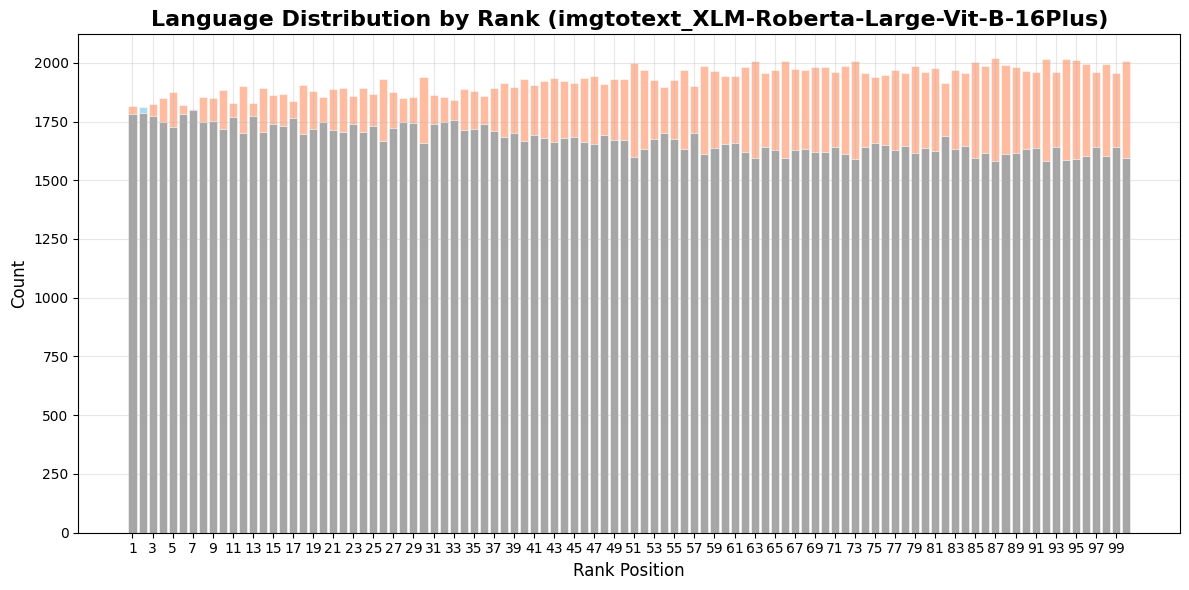

In [ ]:
df = pd.read_csv(path + '/' + x[8])
df = df.merge(lang_type, how='left', left_on='lang', right_on='Id')
df['native'] = df['lang_type'].apply(lambda x: x == 'low')
gen_fig = get_rank_freq(df, file_name, 
    num_top_results=100,
    native_label='Caption Low Resource Language',
    non_native_label='Caption Medium-High Resource Language',
    display=True,
    legend=False
)

Native count by rank: {1: 1597, 2: 1605, 3: 1591, 4: 1616, 5: 1687, 6: 1707, 7: 1676, 8: 1676, 9: 1632, 10: 1712, 11: 1647, 12: 1694, 13: 1659, 14: 1664, 15: 1707, 16: 1785, 17: 1764, 18: 1724, 19: 1692, 20: 1694, 21: 1732, 22: 1720, 23: 1742, 24: 1810, 25: 1726, 26: 1694, 27: 1725, 28: 1723, 29: 1705, 30: 1692, 31: 1708, 32: 1702, 33: 1766, 34: 1728, 35: 1699, 36: 1722, 37: 1763, 38: 1730, 39: 1750, 40: 1756, 41: 1750, 42: 1816, 43: 1785, 44: 1752, 45: 1779, 46: 1746, 47: 1794, 48: 1786, 49: 1768, 50: 1787, 51: 1784, 52: 1766, 53: 1705, 54: 1776, 55: 1731, 56: 1733, 57: 1787, 58: 1800, 59: 1748, 60: 1770, 61: 1760, 62: 1793, 63: 1770, 64: 1768, 65: 1775, 66: 1781, 67: 1790, 68: 1779, 69: 1694, 70: 1834, 71: 1812, 72: 1791, 73: 1786, 74: 1793, 75: 1813, 76: 1796, 77: 1822, 78: 1848, 79: 1723, 80: 1834, 81: 1764, 82: 1791, 83: 1772, 84: 1790, 85: 1812, 86: 1779, 87: 1784, 88: 1786, 89: 1811, 90: 1817, 91: 1822, 92: 1863, 93: 1820, 94: 1779, 95: 1821, 96: 1845, 97: 1831, 98: 1818, 99: 18

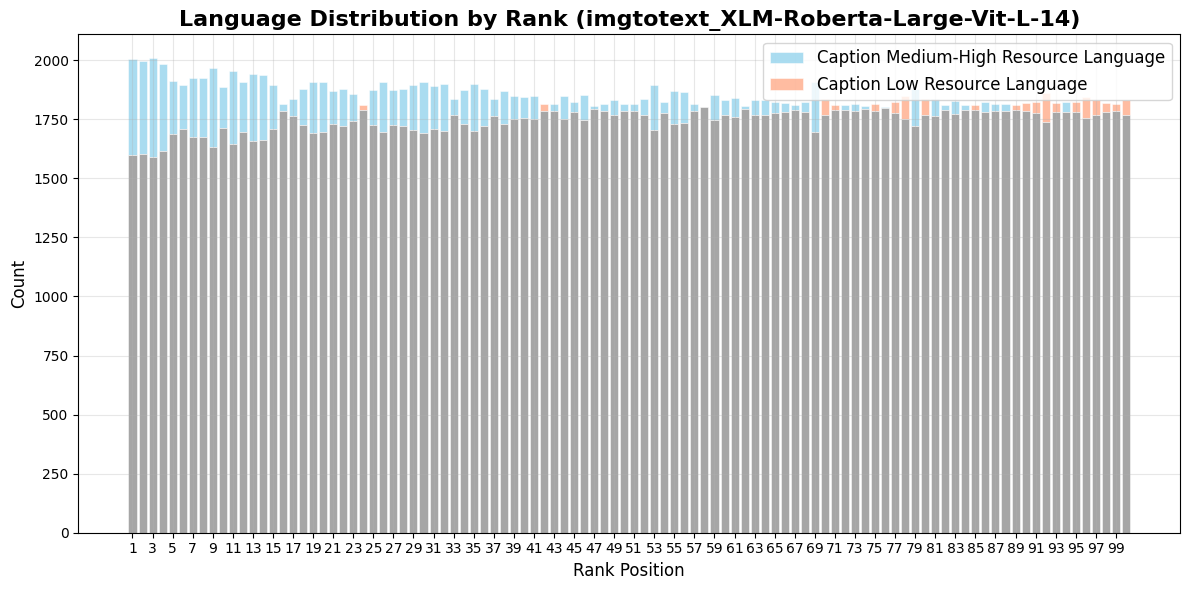

In [10]:
gen_fig = get_rank_freq(df, file_name, 
    num_top_results=100,
    native_label='Caption Low Resource Language',
    non_native_label='Caption Medium-High Resource Language',
    display=True
)